In [1]:

import tensorflow as tf
import datetime, os
import numpy as np
import os
import matplotlib.pyplot as plt

import scipy.ndimage


import tensorflow.keras.preprocessing as kp
import pathlib
import random


from tensorflow.keras import datasets, layers, models

import pandas as pd
#import tqdm
from PIL import Image
from sklearn.model_selection import train_test_split


import numpy as np

from tensorflow import keras

# Display
from IPython.display import display


import math
import matplotlib.cm as cm
from tensorflow.keras.models import Model



In [2]:
#tf.__version__
tf.__version__

'2.8.0'

In [3]:
folder="" #higher folder with images in sub folders. Dataset is already split into the train and test sets
imageType="" # jpg or jpgCrop these images were preprocessed separately and kept is these folders
cropText="NoCrop"  # Crop or NoCrop
modelName="EfNetB0" #Shorten the Name A bit


In [4]:
folderTrain= folder + 'Train' + imageType
X_train=[]
y_train=[]
imageSize=(224,224)
for i in os.listdir(folderTrain):
    X_train.append(np.array(Image.open(folderTrain+i).resize(imageSize)))
    y_train.append(i[:5])
X_train=np.array(X_train)
print(y_train[:3])

['FL_00', 'FL_00', 'FL_00']


In [5]:
X_train, X_val, y_train, y_val  = train_test_split(X_train,y_train,test_size = (208/1008),random_state=13,stratify=y_train)
print(X_train.shape)
print(X_val.shape)

(800, 224, 224, 3)
(208, 224, 224, 3)


In [6]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
print(y_val[:10])
enc = OneHotEncoder()
enc.fit(np.array(y_val).reshape(208,1))
print(enc.transform(np.array(y_val).reshape(208,1))[:10])
print(np.array(y_val).reshape(208,1)[:10])

['NF_27', 'NF_27', 'NF_27', 'FL_00', 'NF_27', 'NF_09', 'FL_09', 'FL_27', 'FL_27', 'FL_00']
  (0, 7)	1.0
  (1, 7)	1.0
  (2, 7)	1.0
  (3, 0)	1.0
  (4, 7)	1.0
  (5, 5)	1.0
  (6, 1)	1.0
  (7, 3)	1.0
  (8, 3)	1.0
  (9, 0)	1.0
[['NF_27']
 ['NF_27']
 ['NF_27']
 ['FL_00']
 ['NF_27']
 ['NF_09']
 ['FL_09']
 ['FL_27']
 ['FL_27']
 ['FL_00']]


In [7]:

from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from tensorflow.keras.utils import to_categorical


labels = ['FL_00','FL_09','FL_18','FL_27','NF_00','NF_09','NF_18','NF_27']
# integer_encoded_reshape = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoder = OneHotEncoder(sparse=False)
enc=LabelEncoder()
enc.fit(y_train)
y_train_hot = to_categorical(enc.transform(y_train).reshape(len(y_train),1))

y_val_hot = to_categorical(enc.transform(y_val).reshape(len(y_val),1))


In [8]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=.1, patience=4, restore_best_weights=True)

## EfficientNetB0

In [9]:
from keras.applications.efficientnet import preprocess_input, EfficientNetB0

input_l=layers.Input(shape=(224,224,3))


base_model = EfficientNetB0(include_top = False,input_tensor=input_l, input_shape = (224,224,3))

base_model.trainable=False;
print(base_model.layers[-1].name)

flat_l=layers.Flatten()(base_model.get_layer(base_model.layers[-1].name).output)
predict_l=layers.Dense(8,activation='softmax')(flat_l)
model=Model(inputs=input_l, outputs=predict_l)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])  

top_activation


In [10]:
history = model.fit(x=preprocess_input(X_train),y=y_train_hot, validation_data =(preprocess_input(X_val), y_val_hot), epochs = 20, verbose = 2, callbacks=[callback])

Epoch 1/20
25/25 - 32s - loss: 3.5137 - categorical_accuracy: 0.5337 - val_loss: 1.7866 - val_categorical_accuracy: 0.7019 - 32s/epoch - 1s/step
Epoch 2/20
25/25 - 24s - loss: 0.7333 - categorical_accuracy: 0.8675 - val_loss: 0.9542 - val_categorical_accuracy: 0.8029 - 24s/epoch - 945ms/step
Epoch 3/20
25/25 - 24s - loss: 0.2689 - categorical_accuracy: 0.9300 - val_loss: 0.7663 - val_categorical_accuracy: 0.8365 - 24s/epoch - 946ms/step
Epoch 4/20
25/25 - 24s - loss: 0.2295 - categorical_accuracy: 0.9463 - val_loss: 0.8244 - val_categorical_accuracy: 0.8125 - 24s/epoch - 974ms/step
Epoch 5/20
25/25 - 24s - loss: 0.2544 - categorical_accuracy: 0.9488 - val_loss: 1.2609 - val_categorical_accuracy: 0.7933 - 24s/epoch - 954ms/step
Epoch 6/20
25/25 - 24s - loss: 0.1872 - categorical_accuracy: 0.9550 - val_loss: 1.9489 - val_categorical_accuracy: 0.7692 - 24s/epoch - 962ms/step
Epoch 7/20
25/25 - 24s - loss: 0.1178 - categorical_accuracy: 0.9737 - val_loss: 1.3164 - val_categorical_accuracy:

In [11]:
base_model.trainable = True

# It's important to recompile your model after you make any changes
# to the `trainable` attribute of any inner layer, so that your changes
# are take into account
model.compile(loss='categorical_crossentropy', optimizer=keras.optimizers.Adam(1e-4), metrics=['categorical_accuracy'])  



In [12]:
history2 = model.fit(x=preprocess_input(X_train),y=y_train_hot, validation_data =(preprocess_input(X_val), y_val_hot), epochs = 20, verbose = 2, callbacks=[callback])

Epoch 1/20
25/25 - 124s - loss: 0.7558 - categorical_accuracy: 0.8150 - val_loss: 0.6507 - val_categorical_accuracy: 0.8558 - 124s/epoch - 5s/step
Epoch 2/20
25/25 - 114s - loss: 0.1307 - categorical_accuracy: 0.9613 - val_loss: 0.6349 - val_categorical_accuracy: 0.8702 - 114s/epoch - 5s/step
Epoch 3/20
25/25 - 114s - loss: 0.0575 - categorical_accuracy: 0.9812 - val_loss: 0.6487 - val_categorical_accuracy: 0.8846 - 114s/epoch - 5s/step
Epoch 4/20
25/25 - 113s - loss: 0.0161 - categorical_accuracy: 0.9962 - val_loss: 0.6974 - val_categorical_accuracy: 0.8750 - 113s/epoch - 5s/step
Epoch 5/20
25/25 - 113s - loss: 0.0087 - categorical_accuracy: 0.9962 - val_loss: 0.7552 - val_categorical_accuracy: 0.8606 - 113s/epoch - 5s/step


In [13]:
print(cropText, modelName)
print(history.history['val_categorical_accuracy'])
print(history2.history['val_categorical_accuracy'])

NoCrop EfNetB0
[0.7019230723381042, 0.8028846383094788, 0.8365384340286255, 0.8125, 0.7932692170143127, 0.7692307829856873, 0.817307710647583]
[0.8557692170143127, 0.870192289352417, 0.8846153616905212, 0.875, 0.8605769276618958]


## Running on TestSet

In [22]:
folderTest= folder + 'Test' + imageType
X_test=[]
y_test=[]
imageSize=(224,224)
for i in os.listdir(folderTest):
    X_test.append(np.array(Image.open(folderTest+i).resize(imageSize)))
    y_test.append(i[:5])
X_test=np.array(X_test)


In [23]:
y_test_hot_r = np.array([[1,0,0,0] if x[-2:] == '00' 
                       else [0,1,0,0] if x[-2:] == '09' 
                       else [0,0,1,0] if x[-2:] == '18' 
                       else [0,0,0,1] for x in y_test])
y_test_hot_f = np.array([[0,1] if x[:2] == 'FL' else [1,0] for x in y_test])

In [24]:

y_test_hot = to_categorical(enc.transform(y_test).reshape(len(y_test),1))

In [25]:
print(X_train.shape)
print(X_test.shape)


(800, 224, 224, 3)
(240, 224, 224, 3)


In [18]:
score= model.evaluate(x=preprocess_input(X_test), y=y_test_hot)


8/8 [==============================] - 7s 836ms/step - loss: 0.8435 - categorical_accuracy: 0.8333


In [19]:
test_predictions=model.predict(preprocess_input(X_test))


In [20]:
np.__version__

'1.21.5'

In [21]:
print(enc.inverse_transform(np.argmax(test_predictions,axis=1)[189:199]))

['NF_18' 'NF_18' 'NF_18' 'NF_18' 'NF_18' 'FL_18' 'NF_18' 'NF_18' 'FL_18'
 'NF_18']


## Visualizing Results

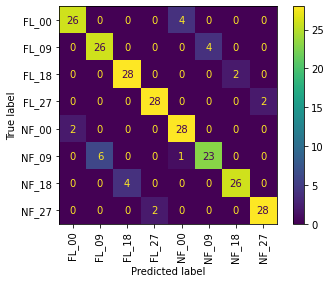

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(y_test,enc.inverse_transform(np.argmax(test_predictions,axis=1)),xticks_rotation="vertical")
#disp.ax_.set_title(title)

plt.show()

## Grad-CAM

In [24]:



def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    # First, we create a model that maps the input image to the activations
    # of the last conv layer as well as the output predictions
    grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )

    # Then, we compute the gradient of the top predicted class for our input image
    # with respect to the activations of the last conv layer
    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    # This is the gradient of the output neuron (top predicted or chosen)
    # with regard to the output feature map of the last conv layer
    grads = tape.gradient(class_channel, last_conv_layer_output)

    # This is a vector where each entry is the mean intensity of the gradient
    # over a specific feature map channel
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))

    # We multiply each channel in the feature map array
    # by "how important this channel is" with regard to the top predicted class
    # then sum all the channels to obtain the heatmap class activation
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)

    # For visualization purpose, we will also normalize the heatmap between 0 & 1
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

In [25]:
mn=f'SavedModels/model{modelName}_220405_{imageType[:-1]}_combo.h5'
model.save(mn)
print(mn, "\nSAVED")
#model_f.save('modelEfNet_220405_jpeg.h5')
#plt.savefig(f'outputFigures/ConfMat_{model_save_as}.jpg')

SavedModels/modelEfNetB0_220405_jpg_combo.h5 
SAVED


In [26]:
#To Load Mode
model = tf.keras.models.load_model("c:/Users/jehui/OneDrive/Desktop/MastersProject/notebooks/1_EfNetB0/SavedModels/modelEfNetB0_220405_jpg_combo.h5")
#model.summary()
model.evaluate(x=X_test, y=y_test_hot)


8/8 [==============================] - 9s 931ms/step - loss: 0.7828 - categorical_accuracy: 0.8875


[0.7828080058097839, 0.887499988079071]

In [27]:
#model.layers[0].summary()
for i in range(len(model.layers)):
    if (i < len(model.layers[:-20])):
        continue
    
    layer = model.layers[i]
    
    # check for convolutional layer
    #if 'conv' not in layer.name:
    #    continue
    # summarize output shape
    print(i, layer.name, layer.output.shape)


219 block6d_drop (None, 7, 7, 192)
220 block6d_add (None, 7, 7, 192)
221 block7a_expand_conv (None, 7, 7, 1152)
222 block7a_expand_bn (None, 7, 7, 1152)
223 block7a_expand_activation (None, 7, 7, 1152)
224 block7a_dwconv (None, 7, 7, 1152)
225 block7a_bn (None, 7, 7, 1152)
226 block7a_activation (None, 7, 7, 1152)
227 block7a_se_squeeze (None, 1152)
228 block7a_se_reshape (None, 1, 1, 1152)
229 block7a_se_reduce (None, 1, 1, 48)
230 block7a_se_expand (None, 1, 1, 1152)
231 block7a_se_excite (None, 7, 7, 1152)
232 block7a_project_conv (None, 7, 7, 320)
233 block7a_project_bn (None, 7, 7, 320)
234 top_conv (None, 7, 7, 1280)
235 top_bn (None, 7, 7, 1280)
236 top_activation (None, 7, 7, 1280)
237 flatten (None, 62720)
238 dense (None, 8)


In [28]:

def save_and_display_gradcam(img, heatmap,actualClass, predictedClass, cam_path="cam.jpg", alpha=0.4):
    # Load the original image

    # Rescale heatmap to a range 0-255
    heatmap = np.uint8(255 * heatmap)

    # Use jet colormap to colorize heatmap
    jet = cm.get_cmap("jet")

    # Use RGB values of the colormap
    jet_colors = jet(np.arange(256))[:, :3]
    jet_heatmap = jet_colors[heatmap]

    # Create an image with RGB colorized heatmap
    jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
    jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
    jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

    # Superimpose the heatmap on original image
    superimposed_img = jet_heatmap * alpha + img
    superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

    # Save the superimposed image
    superimposed_img.save(cam_path)

    # Display Grad CAM
    plt.title(f"Truth: {actualClass}\nPredicted: {predictedClass}")
    plt.imshow(superimposed_img)
    plt.show()


#save_and_display_gradcam(img[0], heatmap)

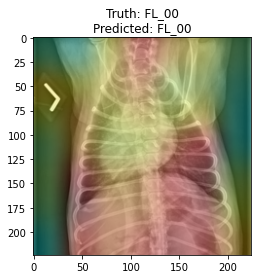

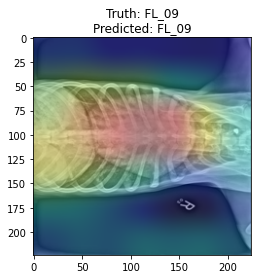

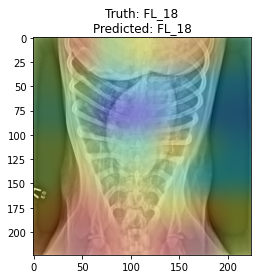

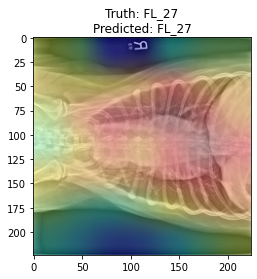

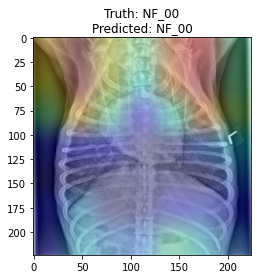

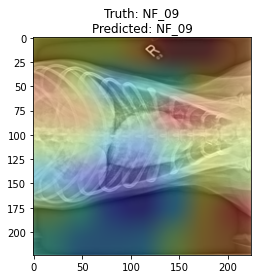

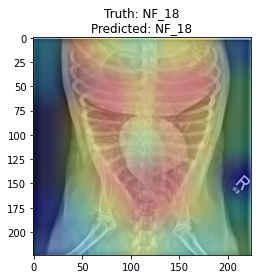

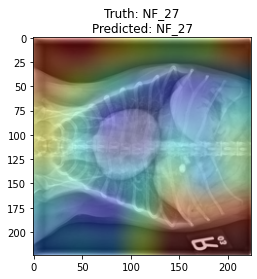

In [30]:

model.layers[-1].activation = None
CAMfolder=f"c:/Users/jehui/OneDrive/Desktop/MastersProject/DataSet/MIDataSplit/ForCAM/{cropText}/"
for file in os.listdir(CAMfolder):
    
    
 
    imageName=file.split('.')[0]
    img=np.array(Image.open(CAMfolder+file).resize(imageSize)).reshape(1,224,224,3)
    preds=enc.inverse_transform(np.argmax(model.predict(preprocess_input(img)),axis=1))
    #preds = model_r.predict(img)
    
    save_and_display_gradcam(img[0], make_gradcam_heatmap(preprocess_input(img), model, "top_conv"),imageName[0:5] , preds[0],cam_path=f"output/C_{cropText}_{preds[0]}-"+imageName+"cam.jpg" )